In [16]:
import quandl
import pandas as pd
import seaborn
from datetime import datetime
import matplotlib.pyplot as plt
import pandas_datareader.data as wb
%matplotlib inline

One of the websites to refer to:
https://www.logilab.org/blogentry/186716

Main Database: FRED

http://pandas.pydata.org/pandas-docs/version/0.18.1/remote_data.html

How to use pandas to link with various database

In [26]:
spy = wb.DataReader('spy', data_source = 'google', )

inflation = wb.DataReader(["CPIAUCSL", "CPILFESL"], "fred", start = datetime(1991, 1, 1), end = datetime(2017, 3, 31))

gdp = wb.DataReader("GDP", "fred", start = datetime(1991, 1, 1), end = datetime(2017, 3, 31))

corporate_debt_pct = wb.DataReader("NCBCMDPMVCE", "fred", start = datetime(1991, 1, 1), end = datetime(2017, 3, 31))
# https://fred.stlouisfed.org/series/NCBCMDPMVCE#0    (Quarterly)

gdp_return = wb.DataReader("A191RL1Q225SBEA", "fred", start = datetime(1991, 1, 1), end = datetime(2017, 3, 31))
# https://fred.stlouisfed.org/series/A191RL1Q225SBEA     (Quarterly)

short_ir = wb.DataReader("USD3MTD156N", "fred", start = datetime(1991, 1, 1), end = datetime(2017, 3, 31))
# https://fred.stlouisfed.org/series/USD3MTD156N#0

ir_ts = wb.DataReader("T10Y3M", "fred", start = datetime(1991, 1, 1), end = datetime(2017, 3, 31))
# https://fred.stlouisfed.org/series/T10Y3M

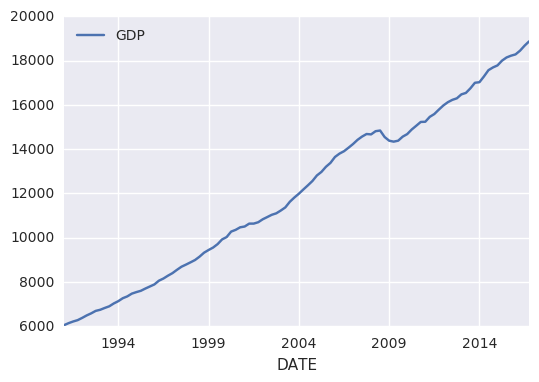

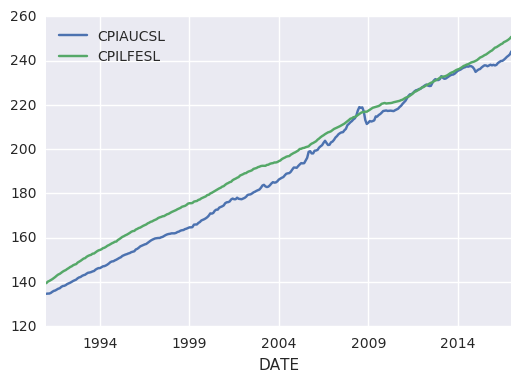

In [20]:
gdp.plot()
inflation.plot()

In [9]:

gdp = quandl.get("FRED/GDP", start_date="2005-01-01", end_date = "2010-01-01")
cpi = quandl.get("FRED/CPIAUCSL", start_date="2005-01-01", end_date = "2010-01-01")
ir = quandl.get("FRED/DTB3", start_date="2005-01-01", end_date = "2017-03-31")



data = pd.DataFrame({'gdp':gdp['VALUE'], 'cpi':cpi['VALUE'], 'ir':ir['VALUE']})

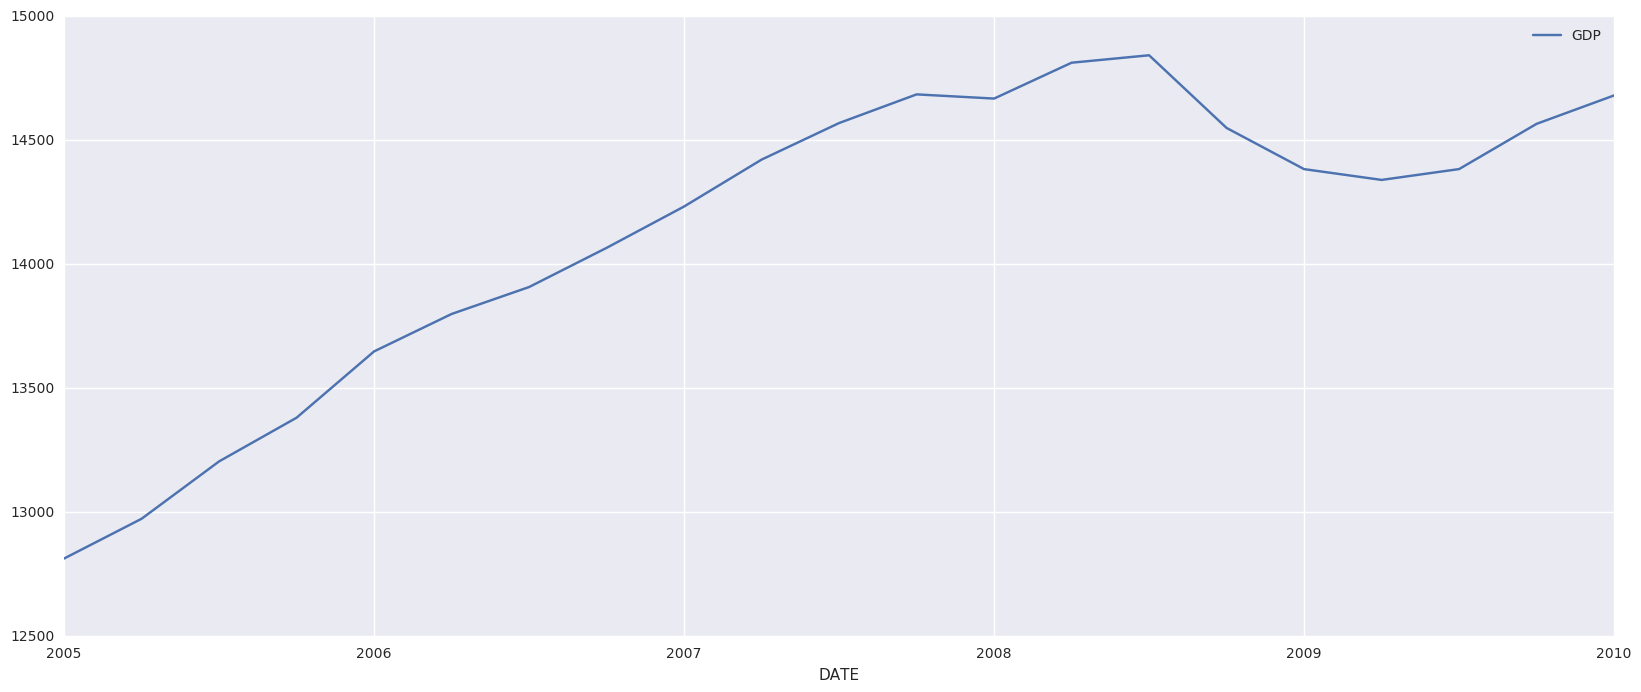

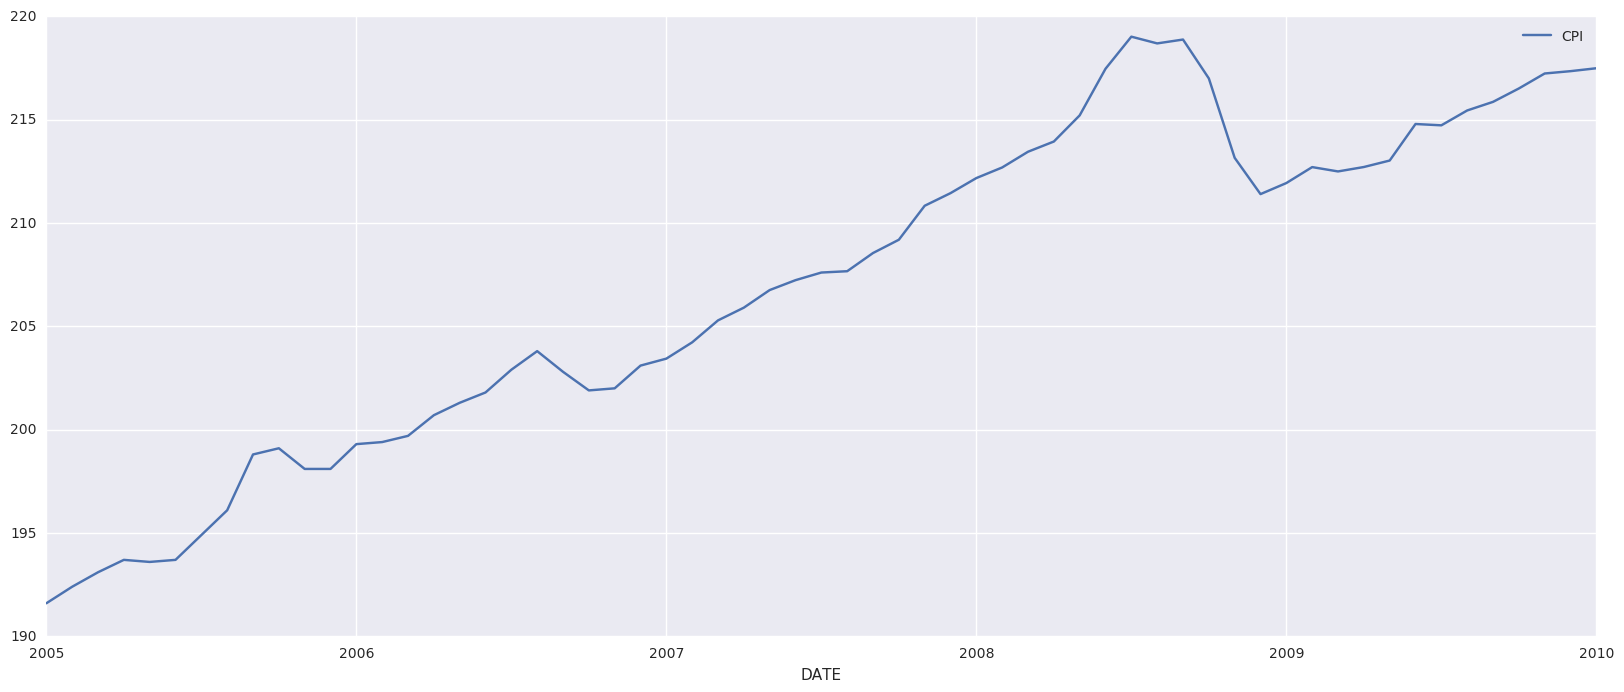

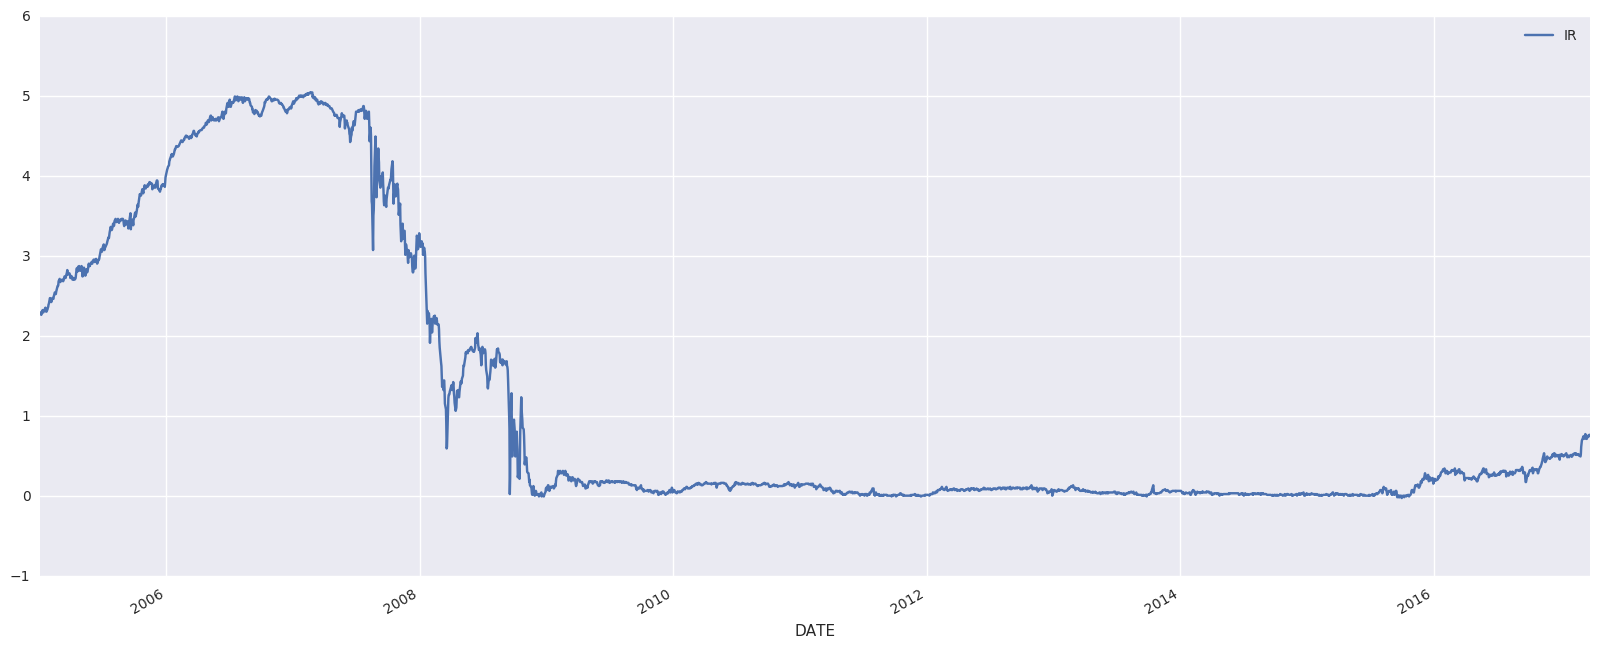

In [10]:
gdp.plot(figsize = (20,8)).legend(['GDP'])
cpi.plot(figsize = (20,8)).legend(['CPI'])
ir.plot(figsize = (20,8)).legend(['IR'])

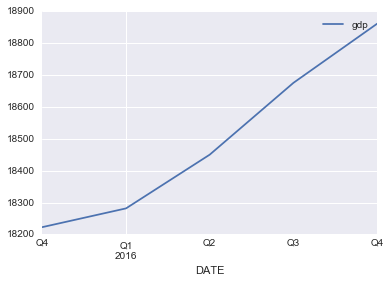

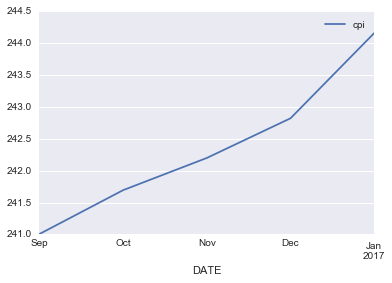

In [15]:
gdp.tail(5).plot().legend(['gdp'])
cpi.tail(5).plot().legend(['cpi'])

In [7]:
print (ir.tail(300))

            VALUE
DATE             
2015-12-11   0.22
2015-12-14   0.26
2015-12-15   0.25
2015-12-16   0.27
2015-12-17   0.23
2015-12-18   0.19
2015-12-21   0.24
2015-12-22   0.21
2015-12-23   0.20
2015-12-24   0.20
2015-12-28   0.23
2015-12-29   0.23
2015-12-30   0.21
2015-12-31   0.16
2016-01-04   0.22
2016-01-05   0.20
2016-01-06   0.21
2016-01-07   0.20
2016-01-08   0.20
2016-01-11   0.21
2016-01-12   0.21
2016-01-13   0.22
2016-01-14   0.25
2016-01-15   0.23
2016-01-19   0.26
2016-01-20   0.26
2016-01-21   0.28
2016-01-22   0.30
2016-01-25   0.31
2016-01-26   0.31
...           ...
2017-01-11   0.51
2017-01-12   0.51
2017-01-13   0.52
2017-01-17   0.54
2017-01-18   0.52
2017-01-19   0.51
2017-01-20   0.49
2017-01-23   0.51
2017-01-24   0.50
2017-01-25   0.49
2017-01-26   0.50
2017-01-27   0.51
2017-01-30   0.51
2017-01-31   0.52
2017-02-01   0.50
2017-02-02   0.51
2017-02-03   0.50
2017-02-06   0.53
2017-02-07   0.53
2017-02-08   0.53
2017-02-09   0.53
2017-02-10   0.54
2017-02-13

In [8]:
ir.values

array([[ 0.07],
       [ 0.07],
       [ 0.05],
       [ 0.04],
       [ 0.05],
       [ 0.04],
       [ 0.05],
       [ 0.03],
       [ 0.04],
       [ 0.04],
       [ 0.04],
       [ 0.05],
       [ 0.04],
       [ 0.04],
       [ 0.04],
       [ 0.04],
       [ 0.05],
       [ 0.05],
       [ 0.04],
       [ 0.02],
       [ 0.02],
       [ 0.05],
       [ 0.06],
       [ 0.07],
       [ 0.07],
       [ 0.08],
       [ 0.07],
       [ 0.05],
       [ 0.05],
       [ 0.03],
       [ 0.02],
       [ 0.05],
       [ 0.06],
       [ 0.05],
       [ 0.05],
       [ 0.05],
       [ 0.05],
       [ 0.05],
       [ 0.04],
       [ 0.05],
       [ 0.05],
       [ 0.05],
       [ 0.06],
       [ 0.05],
       [ 0.06],
       [ 0.05],
       [ 0.05],
       [ 0.05],
       [ 0.05],
       [ 0.05],
       [ 0.06],
       [ 0.05],
       [ 0.06],
       [ 0.06],
       [ 0.06],
       [ 0.06],
       [ 0.05],
       [ 0.05],
       [ 0.04],
       [ 0.04],
       [ 0.05],
       [ 0.04],
       [

In [9]:
non_zero_ir = []
for i in ir.values:
    non_zero_ir.append(i if i else non_zero_ir[-1])
non_zero_ir

0 in non_zero_ir 

False

In [10]:
non_zero_ir
dtir = pd.DataFrame(non_zero_ir, columns = ['VALUE'])
dtir.index = ir.index

In [11]:
dtir

,VALUE
DATE,
2014-01-02,0.07
2014-01-03,0.07
2014-01-06,0.05
2014-01-07,0.04
2014-01-08,0.05
2014-01-09,0.04
2014-01-10,0.05
2014-01-13,0.03
2014-01-14,0.04


In [124]:
new_data = pd.DataFrame({'gdp':gdp['VALUE'], 'cpi':cpi['VALUE']})


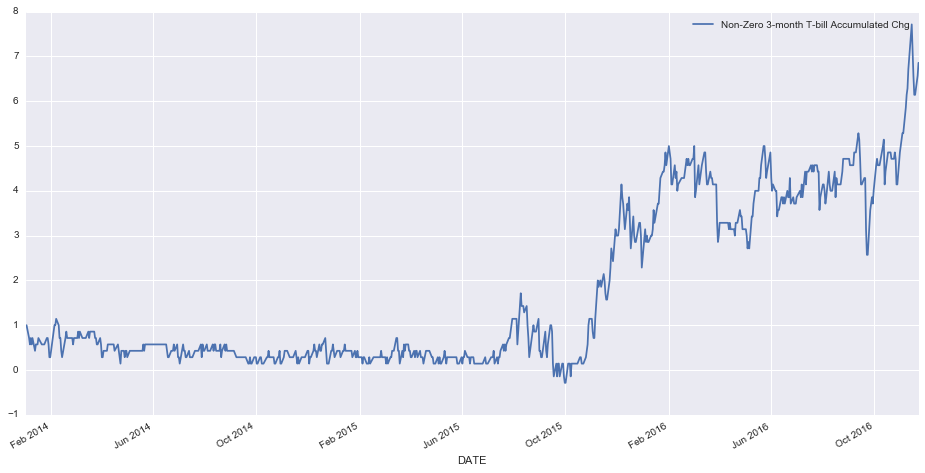

In [125]:
ir_cum_chg = (1+dtir.fillna(method='ffill').pct_change()).cumprod()
ir_cum_chg.plot(figsize = (16,8)).legend(['Non-Zero 3-month T-bill Accumulated Chg']);

               VALUE
DATE                
2015-09-11  0.571429
2015-09-14  1.000000
2015-09-15  1.000000
2015-09-16  0.857143
2015-09-17  0.142857
2015-09-18 -0.142857
2015-09-21  0.142857
2015-09-22 -0.142857
2015-09-23  0.142857
2015-09-24  0.142857
2015-09-25 -0.142857
2015-09-28  0.142857
2015-09-29  0.142857
2015-09-30 -0.142857
2015-10-01 -0.285714
2015-10-02 -0.000000
2015-10-05       NaN
2015-10-06       NaN
2015-10-07       NaN
2015-10-08       NaN
2015-10-09       NaN
2015-10-13       NaN
2015-10-14       NaN
2015-10-15       NaN
2015-10-16       NaN
2015-10-19       NaN
2015-10-20       NaN
2015-10-21       NaN
2015-10-22       NaN
2015-10-23       NaN
...              ...
2016-10-11       NaN
2016-10-12       NaN
2016-10-13       NaN
2016-10-14       NaN
2016-10-17       NaN
2016-10-18       NaN
2016-10-19       NaN
2016-10-20       NaN
2016-10-21       NaN
2016-10-24       NaN
2016-10-25       NaN
2016-10-26       NaN
2016-10-27       NaN
2016-10-28       NaN
2016-10-31   

True

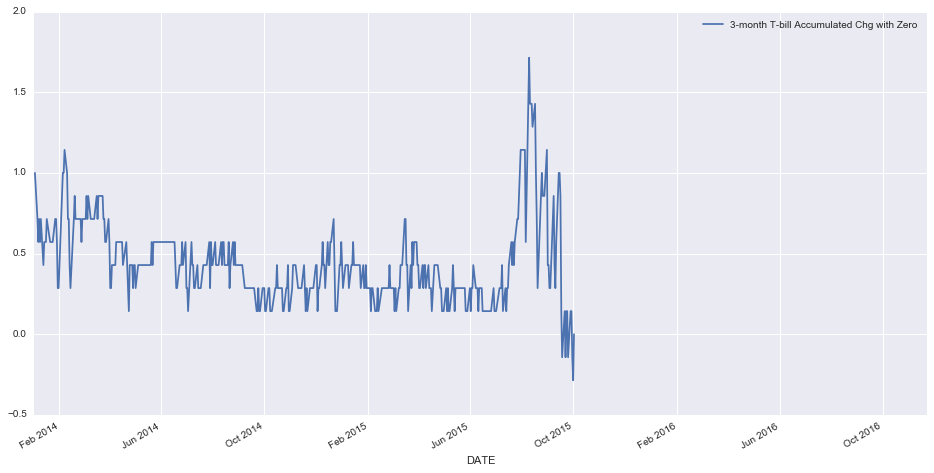

In [126]:
#In contrast, plot the ir's accumulated chg graph:
original_ir_with_zero = (1+ir.fillna(method='ffill').pct_change()).cumprod()
original_ir_with_zero.plot(figsize = (16,8)).legend(['3-month T-bill Accumulated Chg with Zero']);
print (original_ir_with_zero.tail(300))
'VALUE' in original_ir_with_zero

False

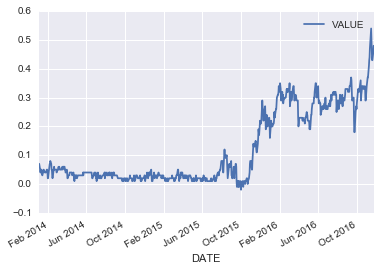

In [127]:
replaced_data = ir.replace(0, 0.000001)
replaced_data.plot()
'0' in ir

In [128]:
zero_fill = 0.00000000000000000001
ir_ = ir.replace(0, zero_fill)
ir_

,VALUE
DATE,
2014-01-02,0.07
2014-01-03,0.07
2014-01-06,0.05
2014-01-07,0.04
2014-01-08,0.05
2014-01-09,0.04
2014-01-10,0.05
2014-01-13,0.03
2014-01-14,0.04


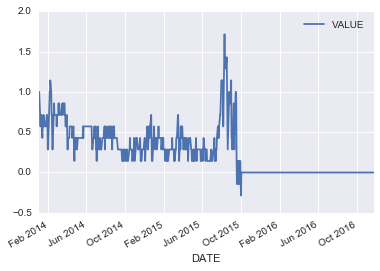

In [129]:
ir_cum_chg2 = (1+ir_.fillna(method='ffill').pct_change()).cumprod()
ir_cum_chg2.plot()

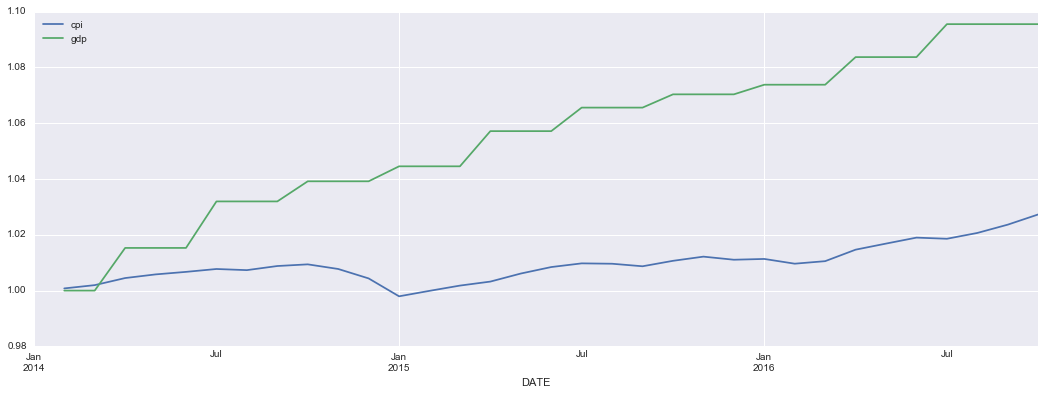

In [130]:
dt = (1+new_data.fillna(method='ffill').pct_change()).cumprod()
dt.plot(figsize = (18,6));

In [131]:
print (dtir.tail(300))

            VALUE
DATE             
2015-09-11   0.04
2015-09-14   0.07
2015-09-15   0.07
2015-09-16   0.06
2015-09-17   0.01
2015-09-18  -0.01
2015-09-21   0.01
2015-09-22  -0.01
2015-09-23   0.01
2015-09-24   0.01
2015-09-25  -0.01
2015-09-28   0.01
2015-09-29   0.01
2015-09-30  -0.01
2015-10-01  -0.02
2015-10-02  -0.02
2015-10-05   0.01
2015-10-06   0.01
2015-10-07   0.01
2015-10-08  -0.01
2015-10-09   0.01
2015-10-13   0.01
2015-10-14   0.01
2015-10-15   0.01
2015-10-16   0.01
2015-10-19   0.02
2015-10-20   0.02
2015-10-21   0.01
2015-10-22   0.01
2015-10-23   0.01
...           ...
2016-10-11   0.35
2016-10-12   0.36
2016-10-13   0.29
2016-10-14   0.31
2016-10-17   0.34
2016-10-18   0.34
2016-10-19   0.34
2016-10-20   0.34
2016-10-21   0.33
2016-10-24   0.33
2016-10-25   0.34
2016-10-26   0.33
2016-10-27   0.29
2016-10-28   0.29
2016-10-31   0.34
2016-11-01   0.35
2016-11-02   0.36
2016-11-03   0.37
2016-11-04   0.37
2016-11-07   0.41
2016-11-08   0.43
2016-11-09   0.44
2016-11-10

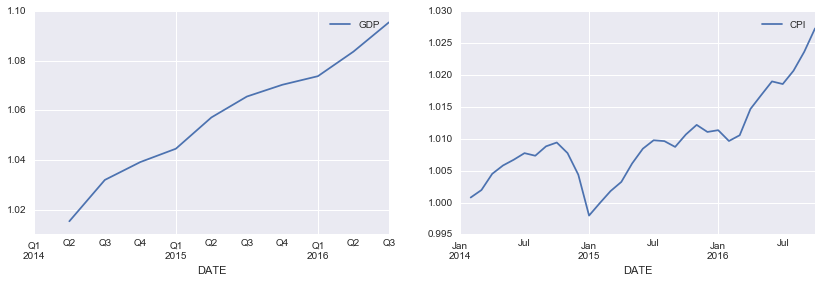

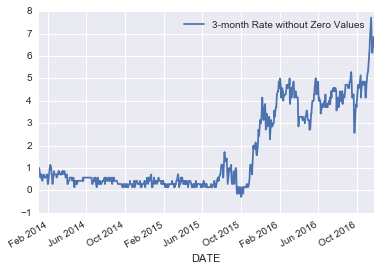

In [132]:
# Try to Put the graphs together
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))

dt_gdp = (1+gdp.fillna(method='ffill').pct_change()).cumprod()
dt_gdp.plot(ax = ax1).legend(['GDP'])
dt_cpi = (1+cpi.fillna(method='ffill').pct_change()).cumprod()
dt_cpi.plot(ax = ax2).legend(['CPI'])
ir_cum_chg = (1+dtir.fillna(method='ffill').pct_change()).cumprod()
ir_cum_chg.plot().legend(['3-month Rate without Zero Values'])

In [133]:
ir == 0

,VALUE
DATE,
2014-01-02,False
2014-01-03,False
2014-01-06,False
2014-01-07,False
2014-01-08,False
2014-01-09,False
2014-01-10,False
2014-01-13,False
2014-01-14,False


In [148]:
for i in ir:
    if i = 0:
    i=i+1
    print 'True'

SyntaxError: invalid syntax (<ipython-input-148-087beab62552>, line 2)